# CS146 Assignment 2: Solutions to optional exercises

## Stretch goal: Reparameterizing the normal likelihood
1. The pdf of the normal distribution is
   $$
    p(x \,|\, \mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\left(x-\mu\right)^2}{2\sigma^2}\right)
   $$

   Reparameterizing in terms of the precision involves replacing all instances of $\frac{1}{\sigma^2}$ with $\tau$.
   $$
    p(x \,|\, \mu,\tau)=\sqrt{\frac{\tau}{2\pi}} \exp\left(-\frac{\tau}{2}\left(x-\mu\right)^2\right)
   $$

2. The Normal-Inverse-Gamma distribution has pdf
   $$
    p(x,\sigma ^2 \,|\, \mu,\lambda,\alpha,\beta) = \frac{\sqrt{\lambda} }{\sigma \sqrt{2\pi }}\frac{\beta ^\alpha }{\Gamma (\alpha) }\left( \frac{1}{\sigma ^2}\right )^{\alpha +1} \exp\left(-\frac{2\beta +\lambda (x-\mu )^2}{2\sigma ^2}\right)
   $$

   Noting that this distribution is over random variables $x$ and $\sigma^2$ we perform the substitution $\tau=\sigma^{-2}$.
   
   $$\begin{align*}
   p(x,\sigma ^2 \,|\, \mu,\lambda,\alpha,\beta)
   &= p(x,\tau \,|\, \mu,\lambda,\alpha,\beta)\left\lvert\frac{\text{d}\sigma^2}{\text{d}\tau}\right\rvert\\
   &=\frac{\sqrt{\tau}\sqrt{\lambda} }{ \sqrt{2\pi }}\frac{\beta ^\alpha }{\Gamma (\alpha) }\left( \tau\right )^{\alpha +1} \exp\left(-\frac{\tau}{2}(2\beta +\lambda (x-\mu )^2)\right)\left\lvert-\frac{1}{\tau^2}\right\rvert\\
   &=\frac{\beta ^\alpha \sqrt{\lambda}}{\Gamma (\alpha) \sqrt{2\pi }} \tau^{\alpha -\frac{1}{2}} \exp\left(-\beta\tau\right) \exp\left(-\frac{\lambda\tau (x-\mu )^2}{2}\right)
   \end{align*}$$
   
   Note that this is the pdf of the normal-gamma distribution.

3. An informal argument for why we must multiply by the factor $\left\lvert\frac{\text{d}\sigma^2}{\text{d}\tau}\right\rvert$ is that given 2 random variables $X, Y$ such that $Y =g(X)$ the cumulative distributions of $X$ and $Y$ have the relation
    $$F_Y(y)=P(Y\le y)=P(g(X) \le y )=P(X \le g^{-1}(y))=F_X (g^{-1}(y))$$
    
    Therefore, from the chain rule of differentiation, the probability densities of $X, Y$ have the relation
    $$f_y(y)=F_Y^{'}(y)=\frac{\text{d}}{\text{d}y}F_X (g^{-1}(y))=f_X (g^{-1}(y))\frac{\text{d}}{\text{d}y}g^{-1}(y)$$
    
    Considering the cases where $g(X)$ is decreasing gives us the absolute value. Thus, when we are performing a transformation we need to multiply the transformed probability distributions with the derivative of the inverse transformative relation $\frac{\text{d}}{\text{d}y}g^{-1}(y)$.

    For a more intuitive explanation, when we transform the cumulative distribution, which tells us about real probabilities (the probability that the random variable is less than a certain value), we can simply use the transformation to know about this probability. However, the probability density does not tell us true probabilities. Informally, the density about a value of the random variable tells us the probability of the random variable in a small region about that value. Therefore, we need to account for how the transformation warps the random variable around that small region. Hence, we need to multiply the transformation by the derivative, which tells us the relationship between the new mapping and the old mapping.

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1a

Generate 1000 samples from a normal distribution with mean 100 and standard
deviation 10. How many of the numbers are at least 2 standard deviations away
from the mean? How many to you expect to be at least 2 standard deviations away
from the mean?

In [9]:
mean = 100
sd = 10
num_samples = 1000

# Generate 1000 samples
samples = np.random.normal(loc=mean, scale=sd, size=num_samples)

# Calculate the absolute value of the difference from the samples to the mean
two_sd_away = np.absolute(samples - mean) > 2 * sd
print(
    np.sum(two_sd_away),
    "numbers are at least 2 standard deviations away from the mean, empirically.")

# Two tailed cdf to find theoretical probability
print(
    ((1 - stats.norm.cdf(2)) * 2) * num_samples,
    "numbers are at least 2 standard deviations away from the mean, theoretically.")

38 numbers are at least 2 standard deviations away from the mean, empirically.
45.5002638964 numbers are at least 2 standard deviations away from the mean, theoretically.


# Question 1b

Toss a fair coin 50 times. How many heads do you have? How many heads to you
expect to have?

In [10]:
tosses = 50
p = 0.5  # Fair coin
# Generate sample from the binomial distribution
heads = np.random.binomial(tosses, p)
print("I have", heads, "heads")
# Compute expected value
print("I expect to have", p * tosses, "heads")

I have 23 heads
I expect to have 25.0 heads


# Question 1c 

Roll a 6-sided die 1000 times. How many 6s did you get? How many 6s do you
expect to get?

In [11]:
rolls = 1000
sides = 6
# Probability of getting each outcome
p = np.ones(sides) / sides
# 6s are the last element of the sample
sixes = np.random.multinomial(rolls, p)[-1]
print("I rolled", sixes, "sixes")
# Expected value of multinomial distribution
print("I expect to have", p[-1] * rolls, "sixes")

I rolled 171 sixes
I expect to have 166.666666667 sixes


# Question 1d

How much area (probability) is to the right of 1.5 for a normal distribution with mean
0 and standard deviation 2?

In [12]:
# The normal cumulative distribution ~ probability to the left
1 - stats.norm.cdf(1.5, loc=0, scale=2)

0.22662735237686826

#  Question 2

Let $y$ be the number of 6s in 1000 rolls of a fair die.
* Draw a sketch of the approximate distribution of $y$, based on the normal approximation.
* Using the normal distribution function in SciPy, give approximate 5%, 25%, 50%, 75%, and 95% points for the distribution of $y$.

$y$ is a binomially distributed variable with a probability of success of $p = \frac{1}{6}$. The normal approximation to the distribution of $y$ is a normal distribution with mean $$np = \frac{1000}{6}$$ and standard deviation $$\sqrt{np(1-p)} = \sqrt{1000\ \frac{1}{6}\ \frac{5}{6}}$$

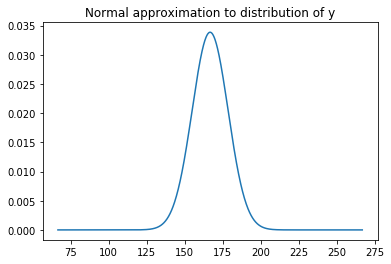

In [16]:
mean = 1000 / 6
sd = (1000 / 6 * 5 / 6) ** 0.5
normal_approx = stats.norm(loc=mean, scale=sd)

x = np.linspace(mean - 100, mean + 100, 1000)
y = normal_approx.pdf(x)
plt.plot(x, y)
plt.title("Normal approximation to distribution of y")
plt.show()

In [17]:
p5, p25, p50, p75, p95 = normal_approx.ppf([0.05, 0.25, 0.5, 0.75, 0.95])
print(
    "The 5%, 25%, 50%, 75%, and 95% points for the distribution of y are respectively:",
    p5, p25, p50, p75, p95)

The 5%, 25%, 50%, 75%, and 95% points for the distribution of y are respectively: 147.281880772 158.71772873 166.666666667 174.615604603 186.051452561


# Question 3

A random sample of $n$ students is drawn from a large population, and their weights are
measured. The average weight of the sampled students is $\hat{y} = 75 kg$. Assume the weights
in the population are normally distributed with unknown mean $\mu$ and known standard
deviation 10 kg. Suppose your prior distribution for $\mu$ is normal with mean 180 and
standard deviation 40.
1. Give your posterior distribution for $\mu$. (Your answer will be a function of $n$.)
    * Given a prior mean $\mu_0$ and prior variance $\sigma_0^2$, the posterior distribution is a normal distribution with posterior mean $$\left(\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}\right)^{-1} \left(\frac{\mu_0}{\sigma_0^2}+\frac{\sum_{i=1}^n x_i}{\sigma^2}\right)$$ and posterior variance $$\left(\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}\right)^{-1}.$$ These equations are in the [Wikipedia table of conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions) under "normal
with known variance".
    * In this example we have prior mean $\mu_0 = 180$ and prior variance $\sigma_0^2=1600$ and known variance $\sigma^2 = 100$. The sum of the data points sufficient statistic $\sum_{i=1}^n x_i$ can be obtained from the average weight of the sampled students $n\hat{y} = 75n$
    * Plugging this into our formula we have posterior mean $$\left(\frac{1}{1600}+\frac{n}{100}\right)^{-1} \left(\frac{180}{1600}+\frac{75n}{100}\right) = 75 + \frac{105}{16n+1}.$$ Note that we can see the posterior mean is a compromise between the average obtained from data and our prior mean 180. As $n$ goes to infinity, we approach the mean obtained from the data. We have posterior variance $$\left(\frac{1}{1600}+\frac{n}{100}\right)^{-1} = \frac{1600}{16n+1}.$$
    * In summary, the posterior distribution for $\mu$ is $$\text{Normal}\left(75 + \frac{105}{16n+1}, \frac{1600}{16n+1}\right).$$

2. A new student is sampled at random from the same population and has a weight of $y'$ pounds. Give a posterior predictive distribution for $y'$. (Your answer will still be a function of $n$.)
    * The posterior predictive distribution is found by integrating out the parameter $\mu$ in the joint parameter–new data distribution conditional on the old data.
      $$p(y'\,|\,y)=\int p(y'\,|\,\theta)p(\theta\,|\,y) d\theta=\int N(y'\,|\,\mu,100) N(\mu\,|\,\mu_{n}, \sigma_{n}^2) \text{d}\mu$$
      Since the normal distribution is symmetric we can write
      $$p(y'\,|\,y)=\int N(\mu\,|\,y',100) N(\mu\,|\,\mu_{n}, \sigma_{n}^2) \text{d}\mu$$
      where $\mu_{n}, \sigma_{n}^2$ are the posterior mean and variance.
    * A product of two Gaussians is also a Gaussian. We have the following identity
      $$N(x\,|\,\mu_1, \sigma_1^2)N(x\,|\,\mu_2, \sigma_2^2) = N\left(\mu_1\,|\,\mu_2,\sigma_1^2+\sigma_2^2\right) N\left(\mu\,\bigg\vert\,\frac{\mu_2\sigma_1^2+\mu_1\sigma_2^2}{\sigma_1^2+\sigma_2^2},\frac{1}{\frac{1}{\sigma_1^2}+\frac{1}{\sigma_2^2}}\right)$$
      For a proof of the identity, read this link http://www.tina-vision.net/docs/memos/2003-003.pdf
    * We rewrite $$N(\mu\,|\,y',100) N(\mu\,|\,\mu_{n}, \sigma_{n}^2)=N\left(y'\,|\,\mu_n,100+\sigma_n^2\right) N\left(\mu\,\bigg\vert\,\frac{\mu_n 100+y'\sigma_n^2}{100+\sigma_n^2},\frac{1}{\frac{1}{100}+\frac{1}{\sigma_n^2}}\right)$$
    * Taking the integral of this expression, we have
      $$\begin{align*}
      p(y'\,|\,y)
      &= \int N\left(y'\,|\,\mu_n,100+\sigma_n^2\right) N\left(\mu\,\bigg\vert\,\frac{\mu_n 100+y'\sigma_n^2}{100+\sigma_n^2},\frac{1}{\frac{1}{100}+\frac{1}{\sigma_n^2}}\right) \text{d}\mu\\
      &=N\left(y'\,|\,\mu_n,100+\sigma_n^2\right) \int N\left(\mu\,\bigg\vert\,\frac{\mu_n 100+y'\sigma_n^2}{100+\sigma_n^2},\frac{1}{\frac{1}{100}+\frac{1}{\sigma_n^2}}\right) \text{d}\mu\\
      &=N\left(y'\,|\,\mu_n,100+\sigma_n^2\right)
      \end{align*}$$
    * We can take the first normal pdf outside of the integral because it does not depend on $\mu$. Furthermore, the integral over the second normal pdf vanishes because we take the integral over the support of the normal distribution — the pdf integrates to 1.

3. For $n = 10$, give a 95% posterior interval for $\theta$ and a 95% posterior predictive interval for $y'$.
    * If $n=10$, the posterior mean is $75 + \frac{105}{16\times10+1} \approx 75.65$ and the posterior variance is $\frac{1600}{16\times10+1} \approx 9.94$.
        * Thus the 95% posterior interval for theta is approximately $(75.65 - 1.96 \sqrt {9.94}, 75.65 + 1.96 \sqrt {9.94}) = (69.47, 81.83)$
    * If $n=10$, the mean of the posterior predictive distribution is also 75.65, but the variance is $9.94+100=109.94$
        * Thus the 95% posterior interval for y' is approximately $(75.65 - 1.96 \sqrt {109.94}, 75.65 + 1.96 \sqrt {109.94}) = (55.10, 96.20)$

4. Do the same for $n = 100$.
    * If $n=100$, the posterior mean is $75 + \frac{105}{16\times100+1} \approx 75.07$ and the posterior variance is $\frac{1600}{16\times100+1} \approx 0.999$.
        * Thus the 95% posterior interval for theta is approximately $(75.07 - 1.96\sqrt {0.999}, 75.07 + 1.96\sqrt {0.999}) = (73.11, 77.03)$
    * If $n=100$, the mean of the posterior predictive distribution is also 75.07, but the variance is $0.999+100=100.999$
        * Thus the 95% posterior interval for y' is approximately $(75.07 - 1.96\sqrt {100.999}, 75.65 + 1.96\sqrt {100.999}) = (55.37, 94.77)$

# Question 4

1. The likelihood of observing $y \ge 100$ is
    $$\begin{align*}
    P(y\ge100\,|\,\lambda)
    &= \int_{100}^{+\infty} \lambda e^{-\lambda y }\text{d}y\\
    &= e^{-100\lambda}
    \end{align*}$$
	* We have the posterior 
    $$\begin{align*}
    P(\theta \,|\, y \ge 100)
    &\propto P(y \ge 100 \,|\, \lambda) P(\lambda)\\
    &=e^{-100\lambda} \text{Gamma}(\lambda\,|\,\alpha,\beta)\\
    &\propto e^{-100\lambda }\left [ \lambda^{\alpha -1}e^{-\beta \lambda} \right ] \\
    &= \lambda^{\alpha -1} e^{-100\lambda -\beta \lambda} \\
    &\propto \text{Gamma}(\lambda\,|\,\alpha,\beta +100 )
    \end{align*}$$
    * The posterior mean of $\theta$ is
    $$\mathbb{E}(\theta ) = \frac{\alpha }{\beta + 100}$$
    * The posterior variance of $\theta$ is
    $$\mathbb{V}(\theta ) = \frac{\alpha }{(\beta + 100)^2}$$
    
2. Since the gamma prior is conjugate to the exponential likelihood, the posterior is also a gamma distribution.

    $$\text{Gamma}(\lambda\,|\,\alpha+1, \beta +100)$$

    * The posterior mean of $\theta$ is
    $$\mathbb{E}(\theta ) = \frac{\alpha + 1 }{\beta + 100}$$
    * The posterior variance of $\theta$ is
    $$\mathbb{V}(\theta ) = \frac{\alpha + 1}{(\beta + 100)^2}$$
    
3. When we have more specific information we know only that the expected value of the posterior variance will decrease, not that the posterior variance will decrease in every case. 

   Qualitatively, the greater we observe $y$ to be, the more "information" we have received, because the probability of observing a high $y$ is so low. Thus, if we observe a large value of $y$, our Bayesian update leads us to believe that the true value of $\lambda$ will likely be low and also to be more certain in this belief. Thus, even though we are given less information about the exact value of $y$ when we are told that $y \ge 100$, we are given more information about the possible range of $y$. That is, we know that $y$ can be greater than 100. These are the two opposing forces that eventually lead to the posterior distribution of $\lambda$ given our observation that $y \ge 100$ being slightly less variable than our posterior distribution of $\lambda$ given our observation that $y = 100$, even though *prima facie* we are given less information in the former case.
    

